### 2. 结合归一化和正则化来优化网络模型结构，观察对比loss结果。

In [4]:
# 导包
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch_nn import TorchNN
from simple_net import SimpleNet
from dropout_net import DropoutNet

In [7]:
# 初始化参数
lr = 0.01
epochs = 200

In [9]:
# 加载 Olivetti Faces 数据集
X, y = fetch_olivetti_faces(data_home="./fdata", return_X_y=True)
print("数据集中图像的维度", X.shape) # (400, 64*64)
print("数据集中图像的数量：", len(X)) # 400
print("数据集中目标标签的数量：", len(y)) # 400

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) 

# 转换为 PyTorch 的 Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# 训练集 320张64*64照片 输出320个对应的标签项
print(X_train_tensor.shape)
print(y_train_tensor.shape)
# 测试集 80张64*64照片 输出80个对应的标签项
print(X_test_tensor.shape)
print(y_test_tensor.shape)

# 创建数据集和数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

数据集中图像的维度 (400, 4096)
数据集中图像的数量： 400
数据集中目标标签的数量： 400
torch.Size([320, 4096])
torch.Size([320])
torch.Size([80, 4096])
torch.Size([80])


In [10]:
# 定义迭代训练函数
def train_iter(model, epochs, train_loader, lr):
    loss_hist_list = []
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(epochs):
        for images, label in train_loader:
            y_hat = model(images)
            # print(y_hat.shape) (320, 40)
            loss = loss_fn(y_hat, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"epoch: {epoch}, loss: {loss.item()}")
        loss_hist_list.append(loss.item())
    return loss_hist_list
        

In [11]:
# 定义测试验证函数
def test_train(model, test_loader):
    total = 0
    correct = 0
    with torch.no_grad():
        for images, label in test_loader:
            y_hat = model(images)
            max_val, max_idx = torch.max(y_hat, dim=1)
            total += y_hat.size(0)
            correct += (max_idx == label).sum().item()
        print(f"total: {total}, correct: {correct}")
    return correct/total * 100

In [12]:
# 定义损失梯度图像函数
def draw_loss_hist(loss_his_list, title):
    plt.plot(loss_his_list)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title)
    plt.show()

In [13]:
# 使用自定义的model
model1 = TorchNN()
model2 = SimpleNet()
# model2.train() # 模型设置为训练模式-默认是开启的（BatchNorm和Dropout会以其特定方式运作）
model3 = DropoutNet()

In [14]:
# 训练模型
loss_his_list1 = train_iter(model1, epochs, train_loader, lr)
loss_his_list2 = train_iter(model2, epochs, train_loader, lr)
loss_his_list3 = train_iter(model3, epochs, train_loader, lr)

epoch: 0, loss: 3.701205253601074
epoch: 1, loss: 3.6647303104400635
epoch: 2, loss: 3.691110134124756
epoch: 3, loss: 3.6870086193084717
epoch: 4, loss: 3.661125421524048
epoch: 5, loss: 3.6539251804351807
epoch: 6, loss: 3.6383631229400635
epoch: 7, loss: 3.671481132507324
epoch: 8, loss: 3.665166139602661
epoch: 9, loss: 3.6161649227142334
epoch: 10, loss: 3.669461727142334
epoch: 11, loss: 3.643385410308838
epoch: 12, loss: 3.6347644329071045
epoch: 13, loss: 3.665651321411133
epoch: 14, loss: 3.6558854579925537
epoch: 15, loss: 3.666447639465332
epoch: 16, loss: 3.639488935470581
epoch: 17, loss: 3.609440803527832
epoch: 18, loss: 3.6312742233276367
epoch: 19, loss: 3.665231943130493
epoch: 20, loss: 3.613457441329956
epoch: 21, loss: 3.6121749877929688
epoch: 22, loss: 3.634030818939209
epoch: 23, loss: 3.6259865760803223
epoch: 24, loss: 3.6162331104278564
epoch: 25, loss: 3.5565805435180664
epoch: 26, loss: 3.604055166244507
epoch: 27, loss: 3.518434762954712
epoch: 28, loss: 3

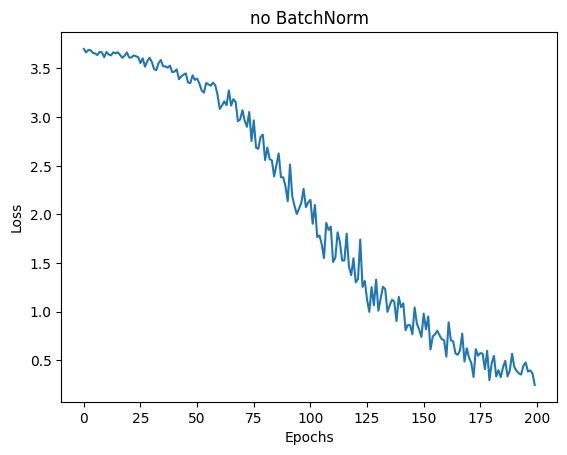

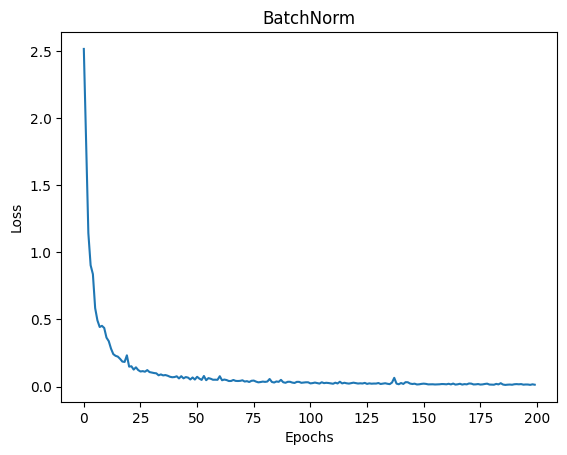

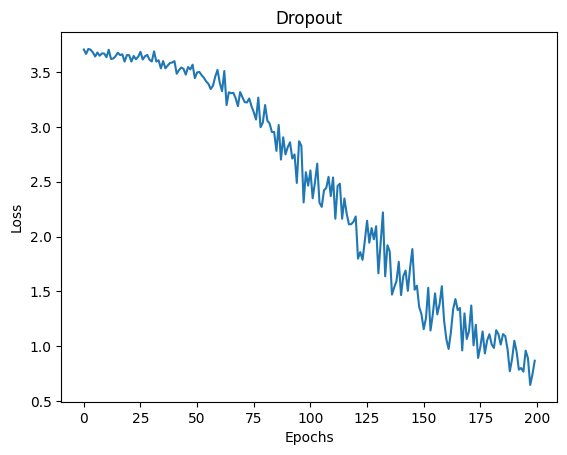

In [15]:
# 绘制损失梯度图像
draw_loss_hist(loss_his_list1, "no BatchNorm")
draw_loss_hist(loss_his_list2, "BatchNorm")
draw_loss_hist(loss_his_list3, "Dropout")

In [16]:
# 测试模型
accuracy1 = test_train(model1, test_loader)
print(f"模型1-no BatchNorm在测试集上的准确率: {accuracy1:.2f}%")

model2.eval() # 评估模式-默认未开启，以评估的特定方式运作，比如Dropout不会随机丢弃神经元
accuracy2 = test_train(model2, test_loader) 
print(f"模型2-BatchNorm在测试集上的准确率: {accuracy2:.2f}%")

model3.eval()
accuracy3 = test_train(model3, test_loader)
print(f"模型3-Dropout在测试集上的准确率: {accuracy3:.2f}%")

total: 80, correct: 67
模型1-no BatchNorm在测试集上的准确率: 83.75%
total: 80, correct: 78
模型2-BatchNorm在测试集上的准确率: 97.50%
total: 80, correct: 62
模型3-Dropout在测试集上的准确率: 77.50%
